# Predicting House prices (Regression)


 ### In this notebook I am going to predict housing prices for the california housing data
 
 **The dataset was obtained from Kaggle**
 
 https://www.kaggle.com/camnugent/california-housing-prices

In [1]:
import os
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio

pio.renderers.default ='png'


## 1. Dataset


In [2]:
# Import the data using the file path

data = pd.read_csv('housing.csv', sep=',')

print(data.shape)

(20640, 10)


In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Description

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea
navigation




## Initial plan for data exploration

<ol>
    <li> Check for missing values, possible correlations. </li>
    <li> Use visualization and other tools to check if some features have impact on Median house prices. </li>
</ol>

 


## 2. Exploratory Data Analysis (EDA)

In [4]:
df = data.copy() # Copying data to df and keeping data pristine

In [5]:
df.shape # Number of rows and columns

(20640, 10)

In [6]:
df.dtypes # Check data-type in df

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
df.ocean_proximity.unique() 

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
df.describe(include='O') #for the object type

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


 **5 types of object values**

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



**Missing values for total_bedrooms.** 


In [11]:
df.isna().sum()  #Checking for null values 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [12]:
df[df.duplicated()] #No duplicates

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [13]:
print(" Total bedrooms \n Mean : %10.2f \n Median:%10.2f \n Mode : %10.2f"%(df.total_bedrooms.mean(), df.total_bedrooms.median(), df.total_bedrooms.mode()))

 Total bedrooms 
 Mean :     537.87 
 Median:    435.00 
 Mode :     280.00


In [14]:
from collections import Counter
Counter(df.total_bedrooms.to_numpy()).most_common(10)

[(280.0, 55),
 (331.0, 51),
 (345.0, 50),
 (393.0, 49),
 (343.0, 49),
 (348.0, 48),
 (328.0, 48),
 (394.0, 48),
 (309.0, 47),
 (272.0, 47)]

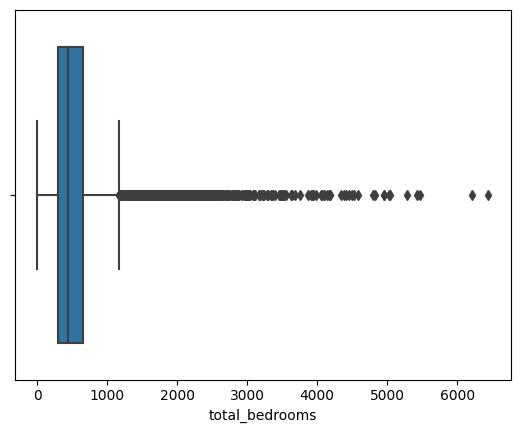

In [15]:
sns.boxplot( x= 'total_bedrooms', data =df)
plt.show()

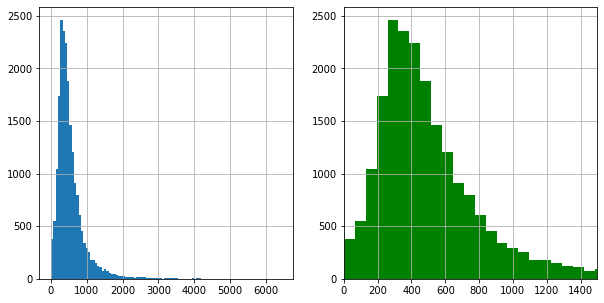

In [16]:
%matplotlib inline 

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].grid()
ax[0].hist(x = df.total_bedrooms.to_numpy(), bins=100)



ax[1].grid()
ax[1].hist(x = df.total_bedrooms.to_numpy(), bins=100, color ='green')
ax[1].set_xlim(0,1500)
plt.show()

**Based on the boxplot there are a lot of outliers in the data.<br> 
Majority of total bedrooms values lies within the range of 200 to 600. <br>
We will use median value for imputing the missing values as the average is quite suceptible to the presence of outliers in the data**


## Visualization of the data

In [17]:
cols = list(df.columns)

cols.remove('longitude')
cols.remove('latitude')

cols

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

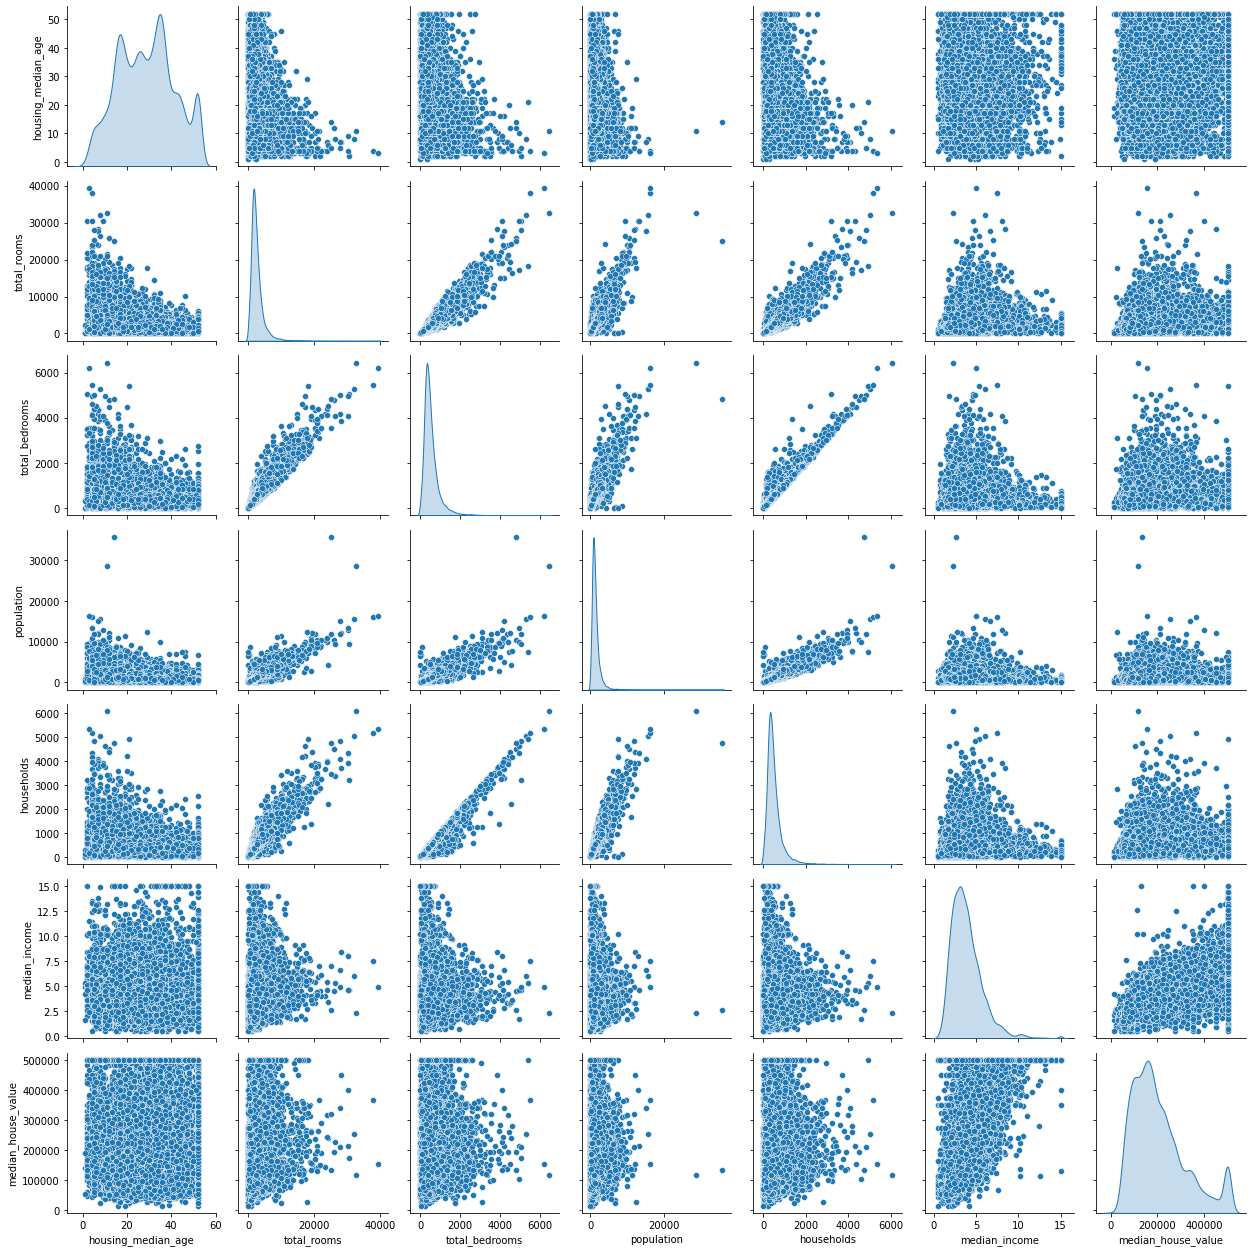

In [18]:
plot_data = df[cols]

sns.pairplot(plot_data, diag_kind ='kde')
plt.tight_layout()
plt.show()

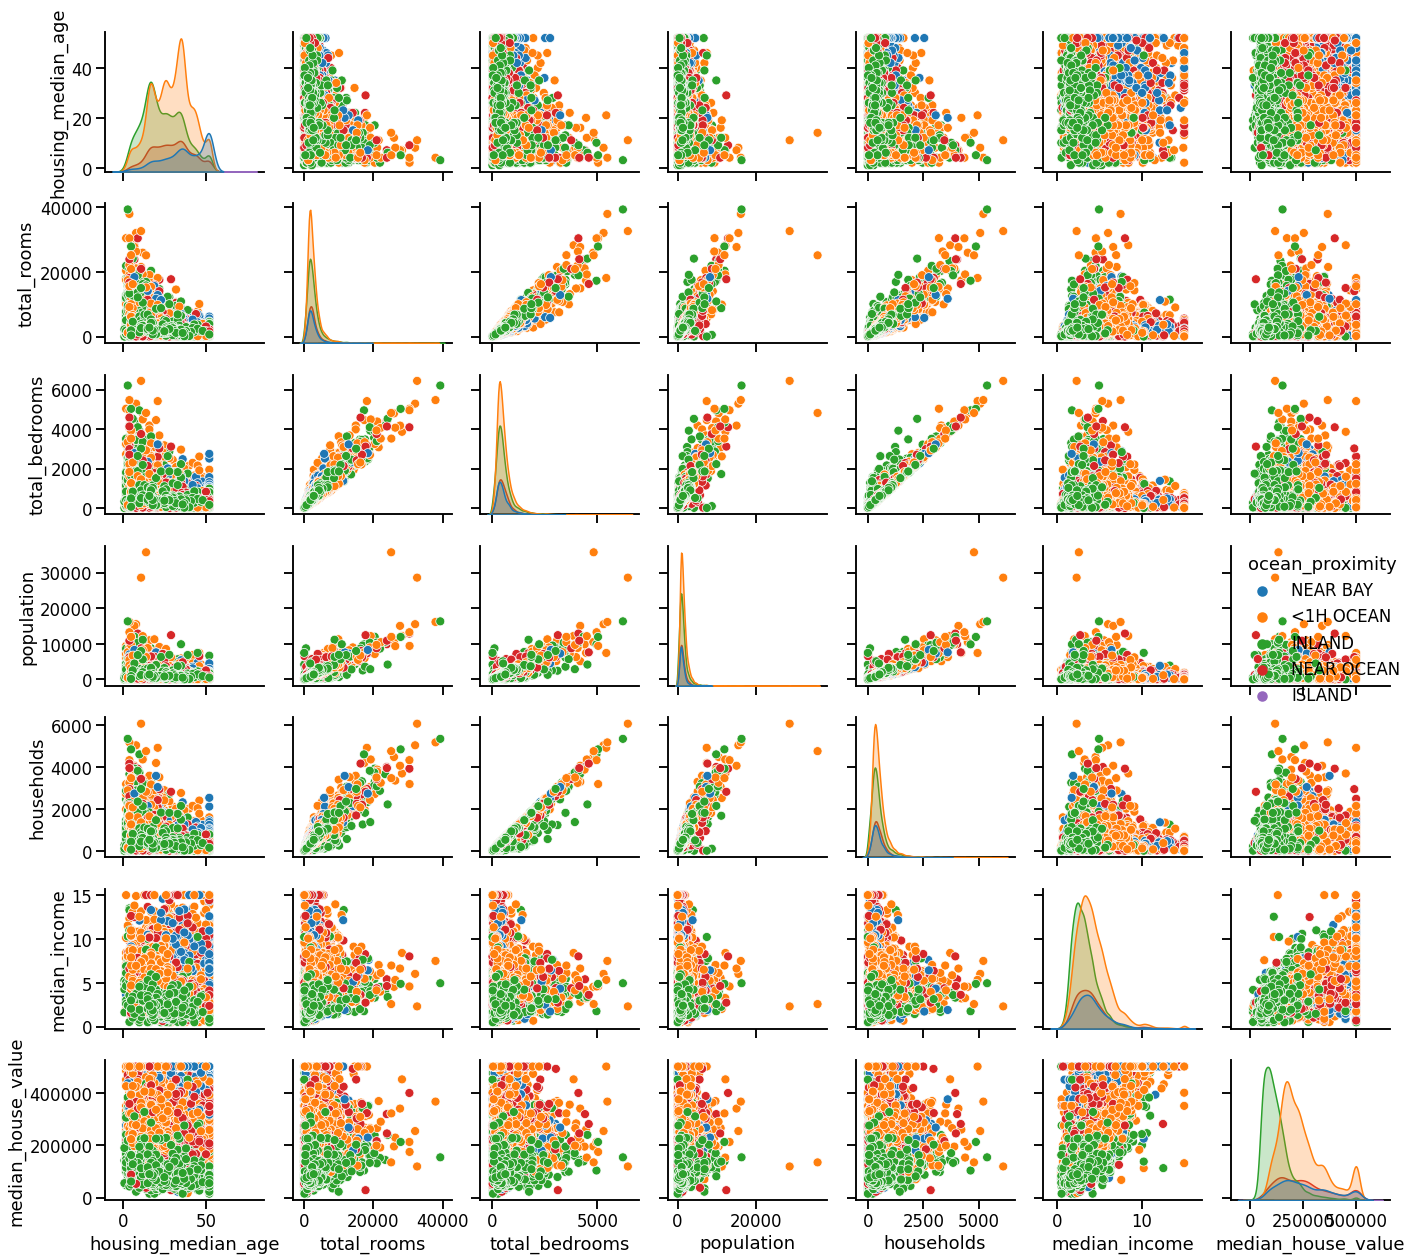

In [19]:
sns.set_context('talk')
sns.pairplot(plot_data, diag_kind ='kde', hue='ocean_proximity')
plt.tight_layout()
plt.show()

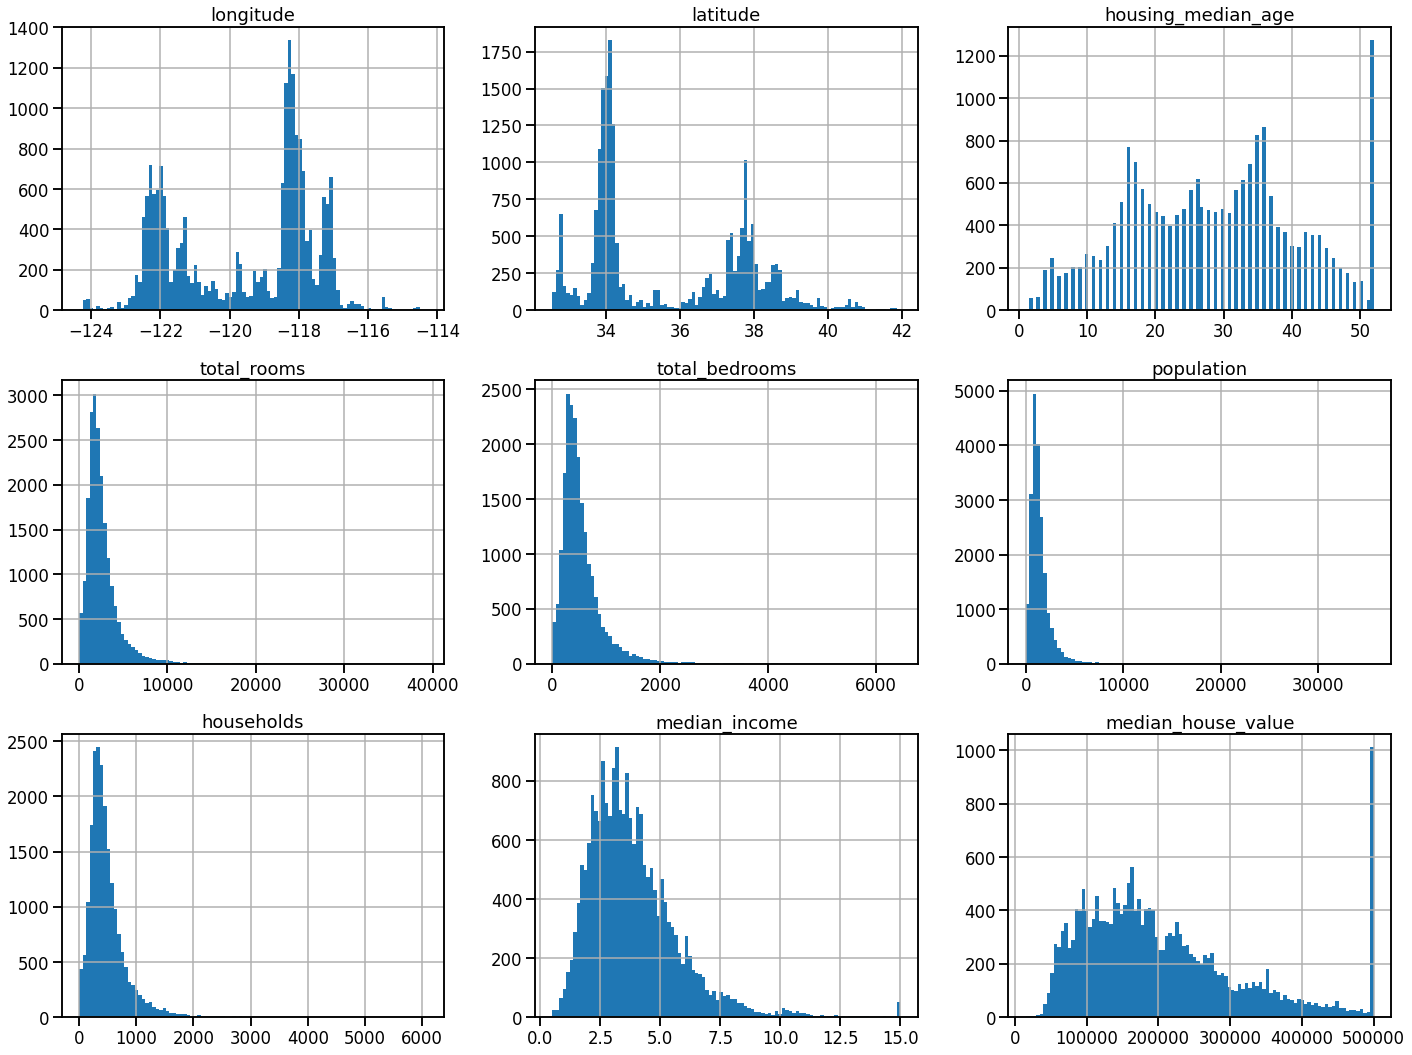

In [20]:
df.hist(bins=100, figsize=(20,15))
plt.tight_layout()
plt.show()

 ### From the above pair plots and histogram we observe: 
**(1) Postive correlation between Household and total bedroom and total rooms which are totally expected.<br> 
  (2) There are outliers in the data as the histogram are skewed.** 

## One Hot Encoding and imputation

In [21]:
#One Hot Encoding 
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [22]:
#Imputation
from sklearn.impute import SimpleImputer

df = df.fillna(df.median())

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  uint8  
 10  ocean_proximity_INLAND      20640 non-null  uint8  
 11  ocean_proximity_ISLAND      20640 non-null  uint8  
 12  ocean_proximity_NEAR BAY    20640 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  206

In [24]:
cols = list(df.columns.values)


corrs = df[cols].corr()['median_house_value'].sort_values()

index_list = list(corrs.index)
value_list = list(corrs.values)


corrs

ocean_proximity_INLAND       -0.484859
latitude                     -0.144160
longitude                    -0.045967
population                   -0.024650
ocean_proximity_ISLAND        0.023416
total_bedrooms                0.049457
households                    0.065843
housing_median_age            0.105623
total_rooms                   0.134153
ocean_proximity_NEAR OCEAN    0.141862
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_<1H OCEAN     0.256617
median_income                 0.688075
median_house_value            1.000000
Name: median_house_value, dtype: float64

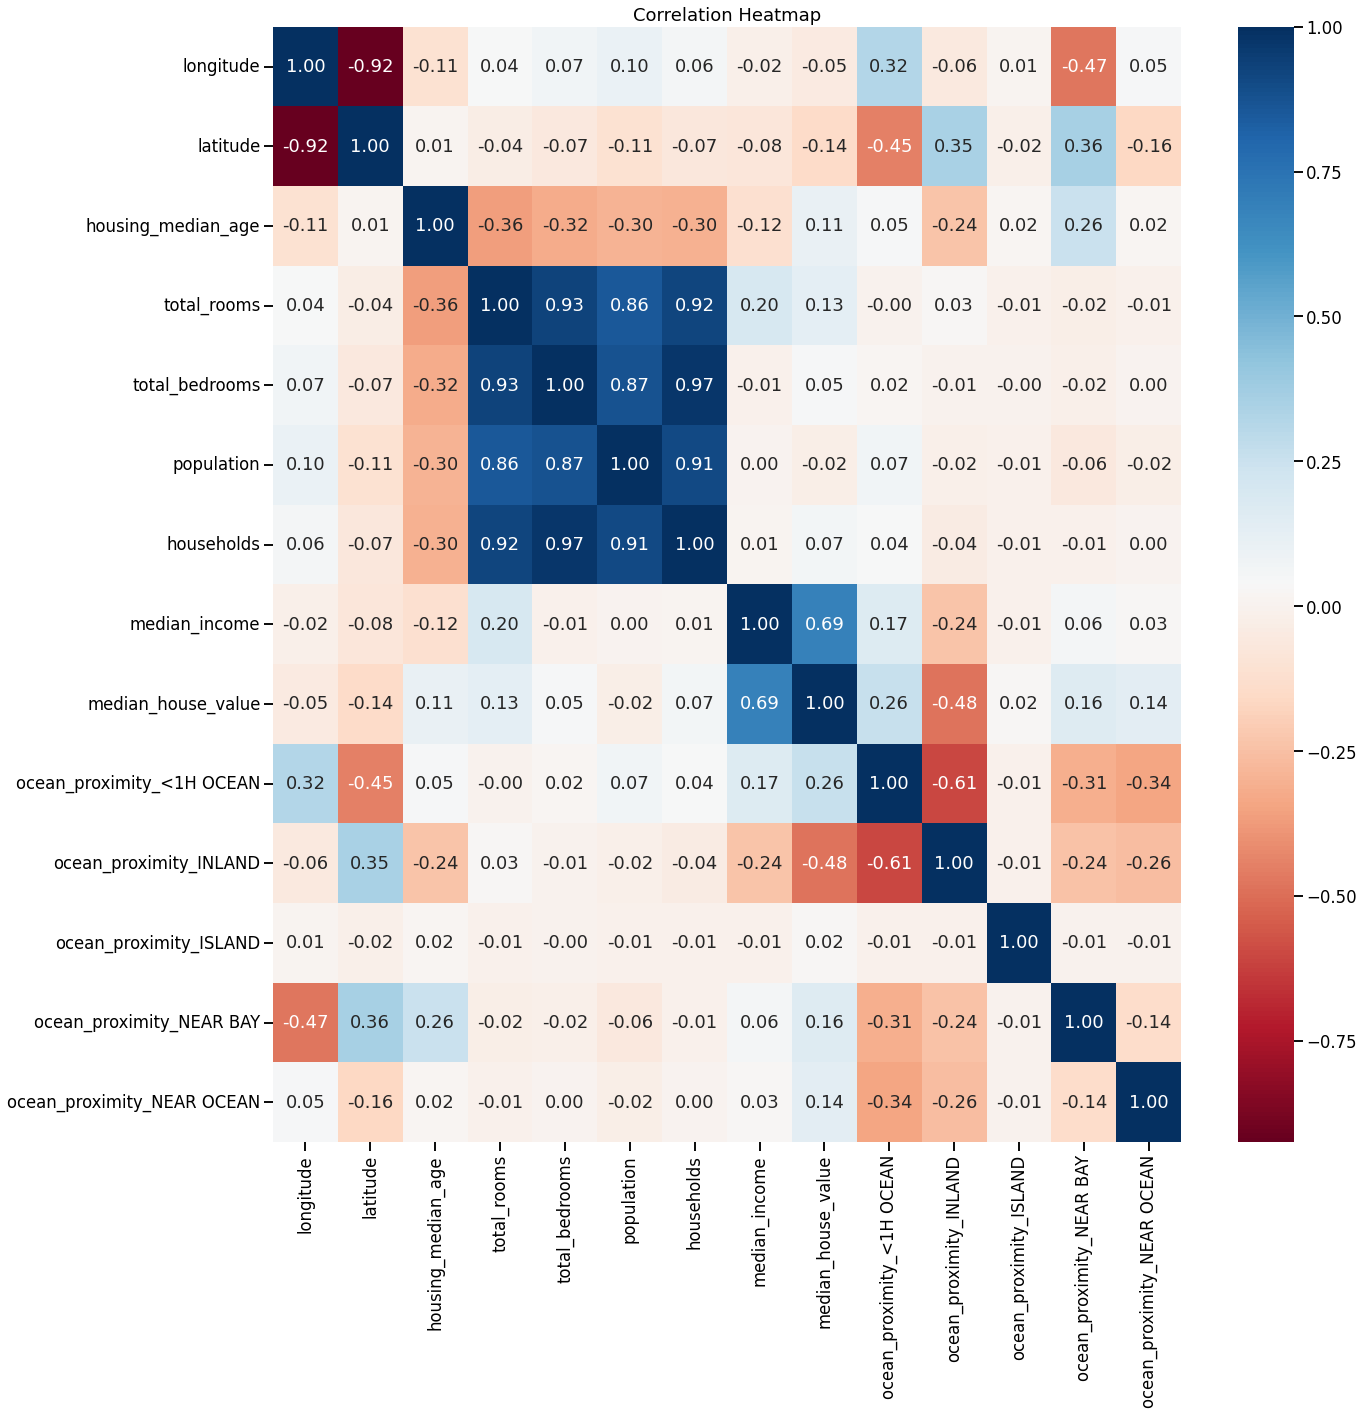

In [25]:
# Pearson correlation between the selected features

plt.figure(figsize = (20, 20))
from mlxtend.plotting import heatmap


cm = df[cols].corr()

sns.heatmap(cm, cmap = 'RdBu', annot = True, fmt ='0.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

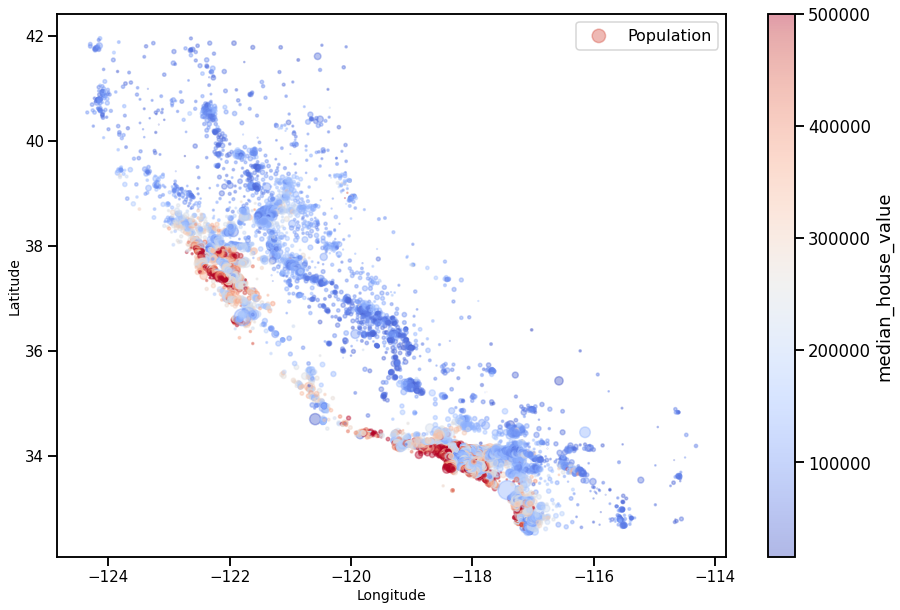

In [26]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

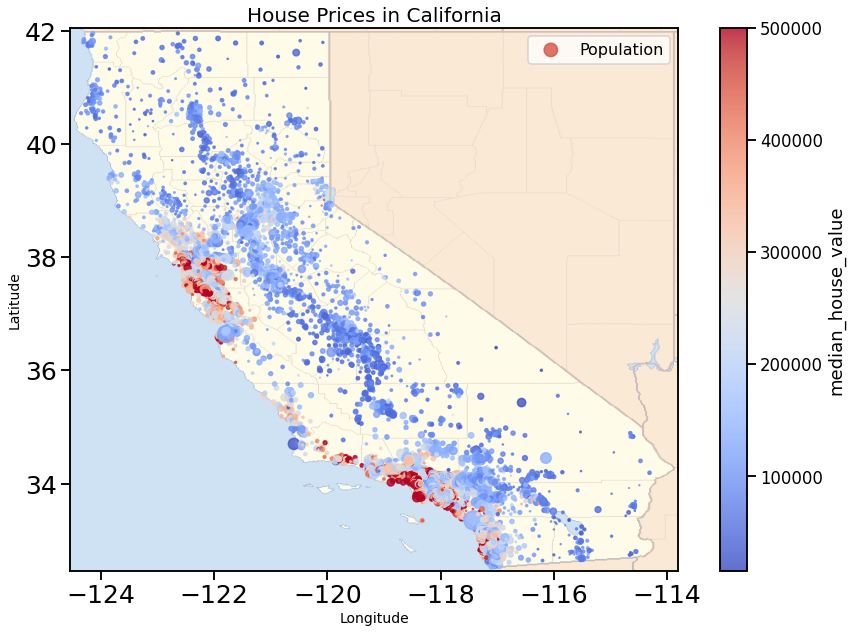

In [27]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")


df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.8, fontsize = 25, sharex = False)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("House Prices in California", fontsize = 20)
plt.legend(fontsize=16)
plt.show()

# 3. Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [29]:
import pickle 

df.to_pickle("./housing_processed_data_before_scaling.pkl")

In [30]:
df = pd.read_pickle('./housing_processed_data_before_scaling.pkl')### Extracting data from the  dataframe

In [31]:
X_total = df.drop('median_house_value', axis = 1)
y_total = df.median_house_value

### Visualizing Median house value

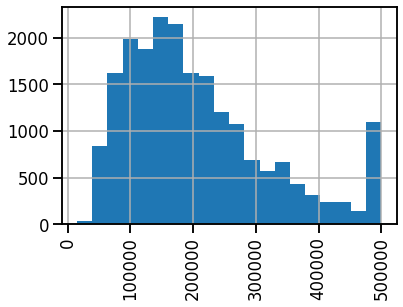

In [32]:
%matplotlib inline 
plt.grid()
plt.hist(y_total, bins = 20)
plt.xticks(rotation = 90)
plt.show()

In [33]:
#Taking log transformation for the final median house prices
y_total = np.log(y_total)

In [34]:
float_columns = X_total.dtypes[X_total.dtypes == float].index.values

In [35]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

for column in float_columns:
    X_total[column] = mm.fit_transform(X_total[[column]])

### Test and Train Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.20, random_state=42)

# 3. Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

## 3a. Linear Regression

### K-fold

In [38]:
kf = KFold(shuffle=True, random_state=72018, n_splits=5)

In [39]:
s = StandardScaler()
lr = LinearRegression()

estimator_lr = Pipeline([("regression", lr)])

#----------------------------- CV----------------------
predictions_CV = cross_val_predict(estimator_lr, X_train, y_train, cv=kf)

#------------------------------Train accuracy------------
estimator_lr.fit(X_train, y_train)
predictions_train = estimator_lr.predict(X_train)

#------------------------------Test accuracy 
predictions_test = estimator_lr.predict(X_test)

print("CV score        :", r2_score(y_train, predictions_CV))
print("Train (R2 score):", r2_score(y_train, predictions_train))
print("Test (R2 score) :", r2_score(y_test, predictions_test))

CV score        : 0.6664236335570772
Train (R2 score): 0.6683601550738913
Test (R2 score) : 0.6498235871950638


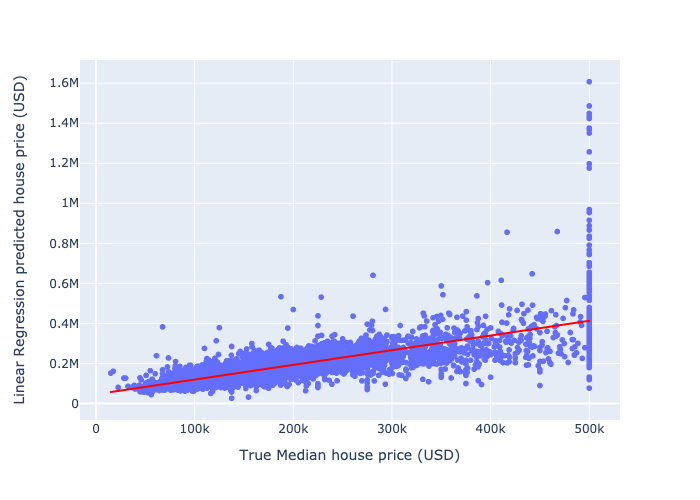

In [40]:
import plotly.express as px


fig = px.scatter(x = np.exp(y_test), y = np.exp(predictions_test),
                 trendline="ols", trendline_color_override= 'red',
                  labels= {"x": "True Median house price (USD)",
                           "y": "Linear Regression predicted house price (USD)"})
fig.show()

### The data consists of some kind of artifical maximum at 500 k which is contributing to the models accuracy. Let us remove this high value prices and see if we could get a better model

## 3b. Linear Regression (without values at 500 K)

In [41]:
df = pd.read_pickle('./housing_processed_data_before_scaling.pkl')

In [42]:
#Extracting houses data with values less than 500K

df2 = df[df.median_house_value<500000]

In [43]:
X_total = df2.drop('median_house_value', axis = 1)
y_total = df2.median_house_value

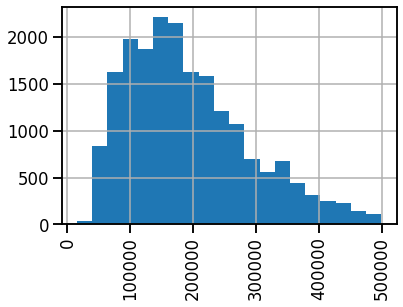

In [44]:
%matplotlib inline 
plt.grid()
plt.hist(y_total, bins = 20)
plt.xticks(rotation = 90)
plt.show()

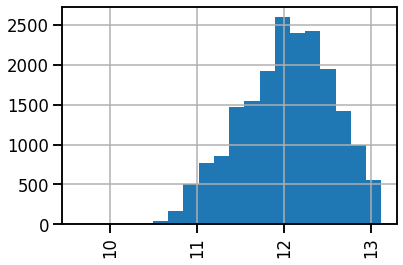

In [45]:
%matplotlib inline 
plt.grid()
plt.hist(np.log(y_total), bins = 20)
plt.xticks(rotation = 90)
plt.show()

In [46]:
#Taking log transformation for the final median house prices
y_total = np.log(y_total)

In [47]:
X_total.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [48]:
float_columns

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [49]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

for column in float_columns:
    X_total[column] = mm.fit_transform(X_total[[column]])

In [50]:
X_total.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019711,0.008941,0.020395,0.539668,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171349,0.067210,0.186842,0.538027,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029179,0.013818,0.028783,0.466028,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036163,0.015555,0.035691,0.354699,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043148,0.015752,0.042270,0.230776,0,0,0,1,0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.20, random_state=42)

In [52]:

lr = LinearRegression()

estimator_lr = Pipeline([("regression", lr)])

#----------------------------- CV----------------------
predictions_CV = cross_val_predict(estimator_lr, X_train, y_train, cv=kf)

#------------------------------Train accuracy------------
estimator_lr.fit(X_train, y_train)
predictions_train = estimator_lr.predict(X_train)

#------------------------------Test accuracy 
predictions_test = estimator_lr.predict(X_test)

print("CV score        :", r2_score(y_train, predictions_CV))
print("Train (R2 score):", r2_score(y_train, predictions_train))
print("Test (R2 score) :", r2_score(y_test, predictions_test))

CV score        : 0.6557397225085893
Train (R2 score): 0.657062571498826
Test (R2 score) : 0.6475048626050508


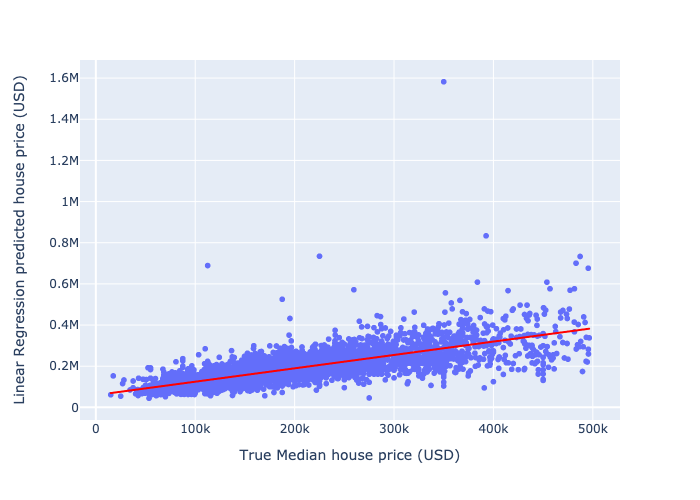

In [53]:
import plotly.express as px


fig = px.scatter(x = np.exp(y_test), y = np.exp(predictions_test),
                 trendline="ols", trendline_color_override= 'red',
                  labels= {"x": "True Median house price (USD)",
                           "y": "Linear Regression predicted house price (USD)"})
fig.show()

### We do not observer substantial change by removing the high end values. We will move away from linear methods and try some non linear methods below.

# 3b. Regression (Non-linear methods)

In [54]:
df = pd.read_pickle('./housing_processed_data_before_scaling.pkl')

In [55]:
X_total = df.drop('median_house_value', axis = 1)
y_total = df.median_house_value

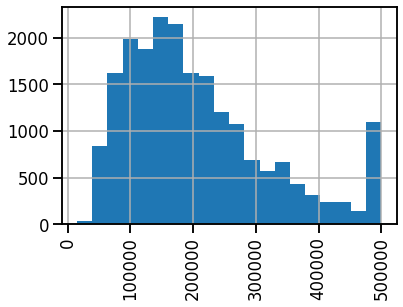

In [56]:
%matplotlib inline 
plt.grid()
plt.hist(y_total, bins = 20)
plt.xticks(rotation = 90)
plt.show()

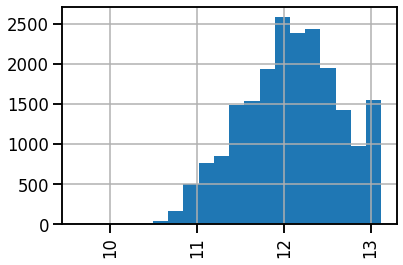

In [57]:
%matplotlib inline 
plt.grid()
plt.hist(np.log(y_total), bins = 20)
plt.xticks(rotation = 90)
plt.show()

In [58]:
#Taking log transformation for the final median house prices
y_total = np.log(y_total)

In [59]:
float_columns = X_total.dtypes[X_total.dtypes == float].index.values
float_columns

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [60]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

for column in float_columns:
    X_total[column] = mm.fit_transform(X_total[[column]])

In [61]:
X_total.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0,0,0,1,0
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0,0,0,1,0
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0,0,0,1,0
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0,0,0,1,0
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0,0,0,1,0


### Train-Test split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.20, random_state=42)

### Models

In [63]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV

In [64]:
r = 1001

models = [LinearRegression(),
          Ridge(random_state=r), 
          KNeighborsRegressor(),
          RandomForestRegressor(random_state=r),
          SVR(kernel ='rbf')]


names = ["LR","RR","KNN","RF","SVR"]


### Parameters

In [65]:
#Linear regression
linear_params = {}

# Ridge regression
ridge_params= {"alpha":np.logspace(-4, 3, 12), "solver":['sag','saga'], "max_iter":[100000]}

#KNeighborsRegressor
knr_params= {"n_neighbors": np.linspace(3,21,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

#random forest regression
n_estimator = [int(x) for x in np.linspace(start = 30, stop = 301, num = 10)]
rfr_params = {  "max_features":        ["log2","sqrt"],
                "min_samples_split":[2,3,5,7],
                "min_samples_leaf": [1,3,5,7],
                "max_depth":        [1,3,5,7],
                "n_estimators":     n_estimator}


#Support vector regression
svr_params = {"C": np.logspace(-2, 1,5),
              "gamma": np.logspace(-2, 1,5),
              "epsilon":[0.1]}


reg_params = [linear_params, ridge_params, knr_params, rfr_params, svr_params]               

In [66]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

cv_result = {}
best_estimators = {}

for name, model, regression_param in zip(names, models,reg_params):
        reg =RandomizedSearchCV(estimator = model, param_distributions = regression_param, n_iter = 100, 
                                cv = 10, verbose=2, random_state=101, n_jobs = 5)
        reg.fit(X_train,y_train)
        cv_result[name]=round(reg.best_score_,2)
        best_estimators[name]=reg.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

Fitting 10 folds for each of 1 candidates, totalling 10 fits
LR cross validation accuracy : 0.670
Fitting 10 folds for each of 24 candidates, totalling 240 fits
RR cross validation accuracy : 0.670
Fitting 10 folds for each of 40 candidates, totalling 400 fits
KNN cross validation accuracy : 0.770
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
RF cross validation accuracy : 0.730
Fitting 10 folds for each of 25 candidates, totalling 250 fits
SVR cross validation accuracy : 0.810


In [67]:
best_estimators

{'LR': LinearRegression(),
 'RR': Ridge(alpha=0.1519911082952933, max_iter=100000, random_state=1001,
       solver='sag'),
 'KNN': KNeighborsRegressor(metric='manhattan', n_neighbors=11, weights='distance'),
 'RF': RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=90, random_state=1001),
 'SVR': SVR(C=10.0, gamma=10.0)}

In [68]:
cv_result

{'LR': 0.67, 'RR': 0.67, 'KNN': 0.77, 'RF': 0.73, 'SVR': 0.81}

In [69]:
CV_train_scores = list(cv_result.values())

CV_train_scores

[0.67, 0.67, 0.77, 0.73, 0.81]

In [70]:

r2_test_scores = []

for x in names:
    model = best_estimators[x]
    
    y_pred_test = model.predict(X_test)
    r2_test_scores.append(round(r2_score(y_test, y_pred_test),2))
    
    print(x,  round(r2_score(y_test, y_pred_test),2))

LR 0.65
RR 0.65
KNN 0.77
RF 0.73
SVR 0.8


In [71]:
results = pd.DataFrame([CV_train_scores, r2_test_scores], columns= names, index =['cv (r2 score)','test (r2 score)'])

In [72]:
results

,LR,RR,KNN,RF,SVR
cv (r2 score),0.67,0.67,0.77,0.73,0.81
test (r2 score),0.65,0.65,0.77,0.73,0.80


In [73]:
predictions_test = best_estimators['SVR'].predict(X_test)

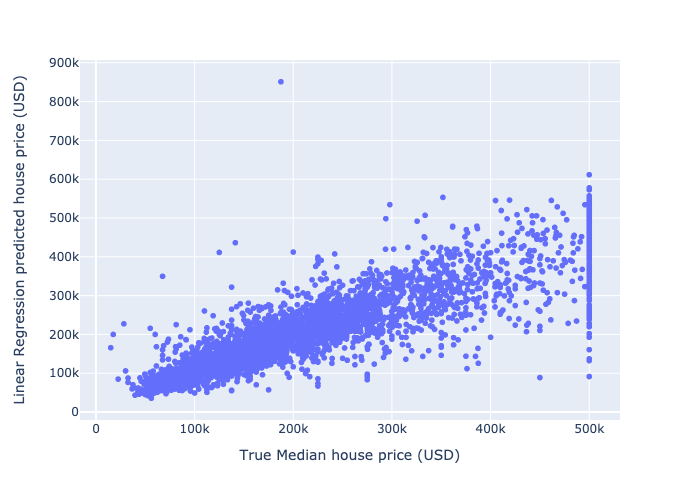

In [74]:
import plotly.express as px


fig = px.scatter(x = np.exp(y_test), y = np.exp(predictions_test),
                  labels= {"x": "True Median house price (USD)",
                           "y": "Linear Regression predicted house price (USD)"})
fig.show()

## Feature importance via. Random Forest

In [75]:
features_importance = zip(list(best_estimators['RF'].feature_names_in_), list(best_estimators['RF'].feature_importances_))

In [76]:
features_importance = sorted(features_importance, key=lambda x: x[1], reverse= True)

In [77]:
feature = []
importances = []
for a, b in features_importance:
    feature.append(a)
    importances.append(b*100)
    

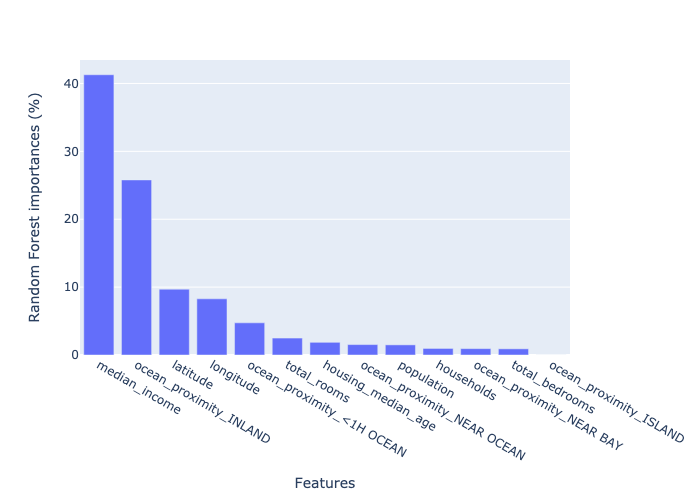

In [78]:
pio.renderers.default = 'png'
fig = px.bar(x = feature, y = importances,
                  labels= {"x": "Features",
                           "y": "Random Forest importances (%)"})
fig.show()

**As we observed with the correlation heat map median income and ocean proximity are the most important features(about 75 percent)**

# 4. Summary

**After calculation and testing different models we conclude that the dataset is best represented by non-linear models. Linear models such as Linear Regression, Ridge Regression do not perform well. However, Non linear models such as Random Forest Regression, K-Nearest Neighbor Regression and Support Vector Machine (Regression, with gaussian kernel) helps to improve the models accuracy.**